In [2]:
# LIBRARY
# http://www.maths.dit.ie/~johnbutler/Izhikevich/IzhikevichModel.html
# vector manipulation
import numpy as np
import sys

# THIS IS FOR PLOTTING
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import warnings
warnings.filterwarnings("ignore")
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


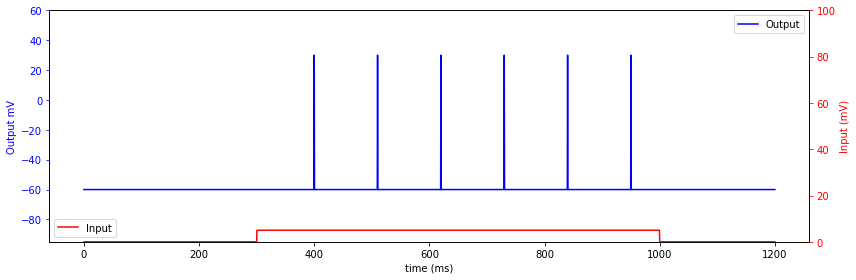

In [75]:
#### Model Input
h=0.5 #step size
input_onset=300             # Onset of input
input_ends=1000
input_amp=5                 # AMPLITUDE OF INPUT


time=np.arange(0,1200.1,h)  # time period 1000ms (1s)

def Compute(input_onset,input_amp):
    I=np.zeros((len(time)))     # CURRENT (INPUT)
    O=np.zeros((len(time)))
    
    RESTING = -60
    MAX = 30.0
    MIN = -70
    
    state = RESTING
    power = 1

    for k in range (0,len(time)):
        level= 0
        if time[k] >input_onset and time[k] < input_ends:
            level = input_amp # Input change
        
        if state < RESTING:
            # recovery period
            state += 1 * power
        elif level:
            state += level/10
        else:
            state -= state / 10
        
        
        if state >= -30:
            state = MAX
            energy = -10
            power *= 0.5
        else:
            state = RESTING
       
            
        I[k]=level
        O[k]=state
        
        
        
    return (I,O)



# PLOTTING THE INPUT    

I,v = Compute(input_onset,input_amp)

fig, ax1 = plt.subplots(figsize=(12,4))
ax1.plot(time, v, 'b-', label = 'Output')
ax1.set_xlabel('time (ms)')
# Make the y-axis label, ticks and tick labels match the line color.
# Plotting out put 
ax1.set_ylabel('Output mV', color='b')
ax1.tick_params('y', colors='b')
ax1.set_ylim(-95,60)
ax2 = ax1.twinx()
# Plotting input on a different axis
ax2.plot(time, I, 'r', label = 'Input')
ax2.set_ylim(0,input_amp*20)
ax2.set_ylabel('Input (mV)', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
ax1.legend(loc=1)
ax2.legend(loc=3)

plt.show()

In [7]:
# Numerical Solution to the Izhikevich model
def Discrete_Model(a,b,u,v,I):
    v = v + h *(0.04*v*v+5*v+140-u+I) # Discrete form of membrane potential of the neuron 
    u = u + h *(a*(b*v-u))            # Discrete form of membrane recovery variable
    return u,v      

In [24]:
def Izhikevich(a=0.02,b=0.2,c=-65,d=8):
    v=-65*np.ones((len(time)))  # SETS UP THE INITIAL VALUES of the membrane potential
    u=0*np.ones((len(time)))    # SETS UP THE INITIAL VALUES of the membrane recovery
    u[0]=b*v[0]                 # INITIAL CONDITION 
    
    spiketime=[]
    fired=[]
    I=Input(input_onset,input_amp)
    # EULER METHOD
    for k in range (0,len(time)-1):
        u[k+1],v[k+1]=Discrete_Model(a,b,u[k],v[k],I[k]) # Numerically solving the equations at each time point
           
        if v[k+1]>30:
            v[k+1]=c
            u[k+1]=u[k+1]+d
    plot_input_output(time,v,I,a,b,c,d)   

In [27]:
def plot_input_output(time,v,I,a,b,c,d):   
    # PLOTTING
    fig, ax1 = plt.subplots(figsize=(12,4))
    ax1.plot(time, v, 'b-', label = 'Output')
    ax1.set_xlabel('time (ms)')
    # Make the y-axis label, ticks and tick labels match the line color.
    # Plotting out put 
    ax1.set_ylabel('Output mV', color='b')
    ax1.tick_params('y', colors='b')
    ax1.set_ylim(-95,40)
    ax2 = ax1.twinx()
    # Plotting input on a different axis
    ax2.plot(time, I, 'r', label = 'Input')
    ax2.set_ylim(0,input_amp*20)
    ax2.set_ylabel('Input (mV)', color='r')
    ax2.tick_params('y', colors='r')
    
    fig.tight_layout()
    ax1.legend(loc=1)
    ax2.legend(loc=3)
    ax1.set_title('Parameters a %s b: %s c:  %s d:  %s' %(a,b,c,d))
    plt.show()

In [31]:
interact(Izhikevich, a=(0.02,0.1,0.02), b=(0.2,0.26,0.02),c=(-65,-50), d=(0.05,8));


interactive(children=(FloatSlider(value=0.02, description='a', max=0.1, min=0.02, step=0.02), FloatSlider(valu…